In [0]:
from google.colab import drive;
drive.mount('/content/drive')

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [0]:
loan_pd = pd.read_csv('/content/drive/My Drive/AI_ML_CLass/Assignments/external/supervisedLearning/project2/Bank_Personal_Loan_Modelling.csv')

In [0]:
# Printing  10 random rows of dataframe
rand=np.random.randint(1,5000,10)
loan_pd.iloc[rand]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2043,2044,57,32,25,90049,2,0.20,3,0,0,0,0,1,1
4993,4994,45,21,218,91801,2,6.67,1,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
3293,3294,44,20,62,94939,2,2.50,1,0,0,1,0,1,0
1481,1482,35,9,179,91125,2,0.00,1,76,0,1,0,1,0
4112,4113,34,9,65,95014,3,0.70,2,104,0,0,0,1,0
3676,3677,62,37,22,95818,1,1.50,2,111,0,0,0,1,0
2363,2364,39,13,61,90095,2,2.40,2,90,0,0,0,1,0
1059,1060,28,2,11,91203,1,0.10,2,0,0,0,0,1,1
4310,4311,65,41,170,94143,4,6.10,2,0,1,0,1,1,1


In [0]:
# ID column is just id of customer so dropping column
loan_df_modified=loan_pd.drop(columns=['ID'])

In [0]:
loan_df_modified.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [0]:
loan_df_modified.columns=['Age','Experience','Income','Zip','Family','CreditSpendAvg','Education','MortgageHouse','PersonalLoan',
                          'SecurityAccount','CDAccount','OnlineBanking','CreditCard']

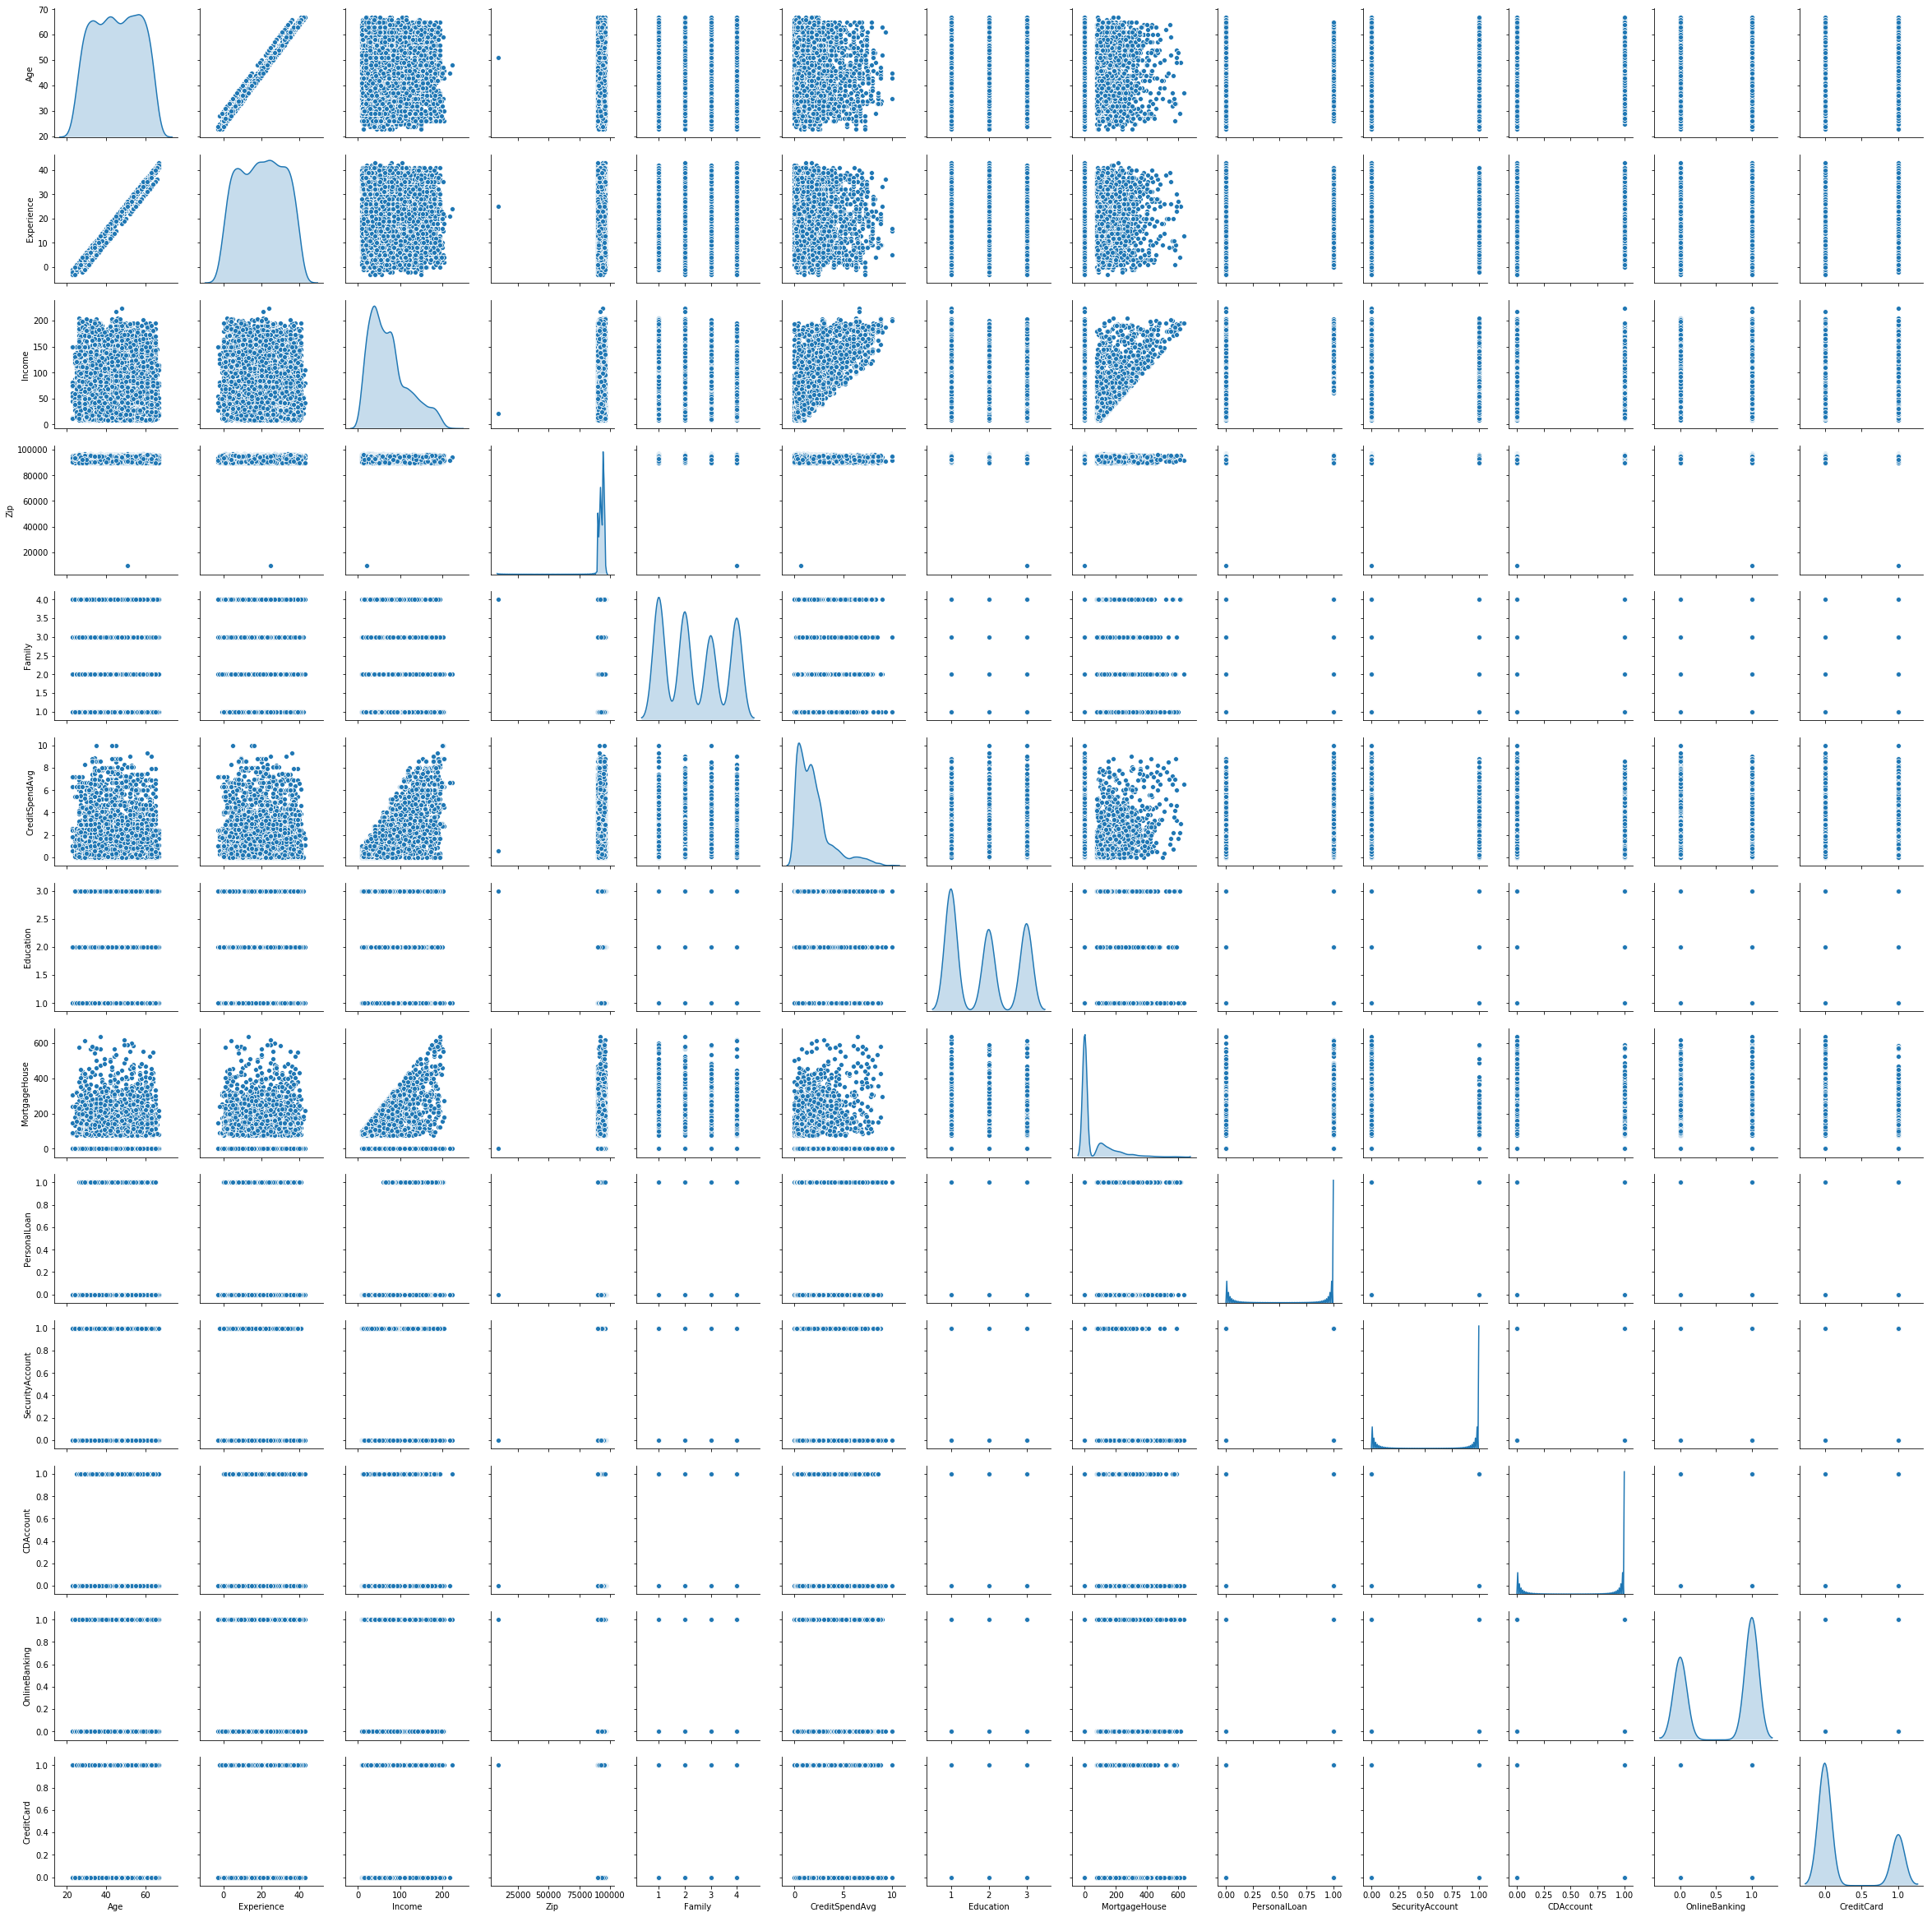

In [0]:
sns.pairplot(loan_df_modified,diag_kind='kde')

In [0]:
loan_df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
Age                5000 non-null int64
Experience         5000 non-null int64
Income             5000 non-null int64
Zip                5000 non-null int64
Family             5000 non-null int64
CreditSpendAvg     5000 non-null float64
Education          5000 non-null int64
MortgageHouse      5000 non-null int64
PersonalLoan       5000 non-null int64
SecurityAccount    5000 non-null int64
CDAccount          5000 non-null int64
OnlineBanking      5000 non-null int64
CreditCard         5000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 507.9 KB




*   In above pair-plot, we can see there are some relatioship between independent variable means that they are partial dependent.
*   MortgageHouse vs Income and CrediSpendSaving vs Income showing some relation between them.
*  each distribution is not pure gaussion curv. It is look-like there are two or three sample data-set were mixed. 



==============================================================Question : 2 =============================

In [0]:
# after looking result of info function, We can conclude there are no missing value in Data beacuse here all records counts are same.

1. I will take help of cross tab to determine relation between personal loan with other fetures like education,zipcode,family,online,CD account.

In [0]:
pd.crosstab(loan_df_modified.Education,loan_df_modified.PersonalLoan, margins=True, margins_name="Total")

PersonalLoan,0,1,Total
Education,,,
1,2003,93,2096
2,1221,182,1403
3,1296,205,1501
Total,4520,480,5000


# Conclusion-1 : 


*  Data showing most of undergraduate people were targeted but number of responses recieved from these people are very low.
*  It seems 205 out 1501 highly qualified people and 182 out of 1403 graduated  applied personal loan.
*  Finally we can conclude graduated and highly qualified people need money more than undergraduate. So personal loan Target should be to these people.



Text(0, 0.5, 'Age')

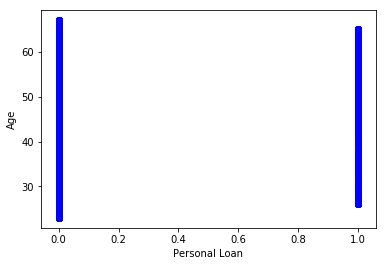

In [0]:
plt.scatter(x=loan_df_modified.PersonalLoan,y=loan_df_modified.Age,c='blue')
plt.xlabel('Personal Loan')
plt.ylabel('Age')

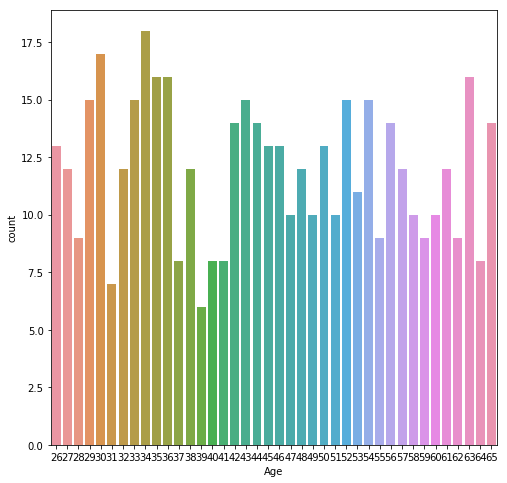

In [0]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(loan_df_modified[loan_df_modified.PersonalLoan==1].Age,ax=ax)

# Conclusion-2 

*   After looking scatter plot , There is no significant impact or correlation  between Age and Personal Loan.It mean, Bank Recieve response from all age group.
*   Still, Looking bar-graph result,We can conclude target age should be between from 26 to 65.
*But High response range is between (29 - 36), But We recieve response from Older people as well as in singificant way.So We cannot ignore them.


In [0]:
pd.crosstab(loan_df_modified.Family,loan_df_modified.PersonalLoan, margins=True, margins_name="Total")

PersonalLoan,0,1,Total
Family,,,
1,1365,107,1472
2,1190,106,1296
3,877,133,1010
4,1088,134,1222
Total,4520,480,5000


# Conclusion 3 

*   From above Cross-tab, family which having one member and two member were most targeted. 
*  But Majority of famliy which having three and four member accepted personal loan. 



Text(0, 0.5, 'PersonalLoan')

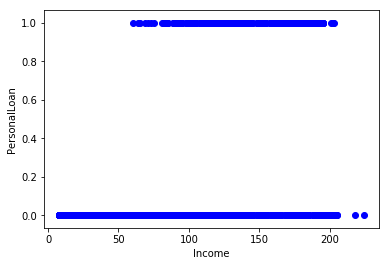

In [0]:
plt.scatter(x=loan_df_modified.Income,y=loan_df_modified.PersonalLoan,c='blue')
plt.xlabel('Income')
plt.ylabel('PersonalLoan')

# Colculsion 4

*    Majority of high salaried,range varies roughly between 80 to 200, person responded back to campaign.



Text(0, 0.5, 'PersonalLoan')

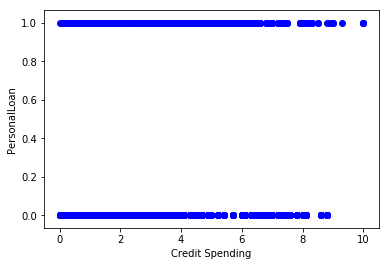

In [0]:
plt.scatter(x=loan_df_modified.CreditSpendAvg,y=loan_df_modified.PersonalLoan,c='blue')
plt.xlabel('Credit Spending')
plt.ylabel('PersonalLoan')

# Conclusion 5 :



*   No such significant relation between credit spending and Personal Loan


Text(0, 0.5, 'PersonalLoan')

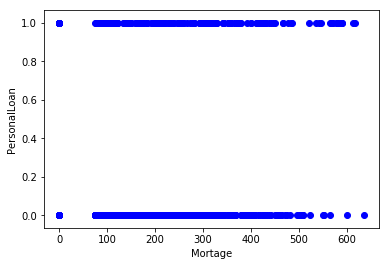

In [0]:
plt.scatter(x=loan_df_modified.MortgageHouse,y=loan_df_modified.PersonalLoan,c='blue')
plt.xlabel('Mortage')
plt.ylabel('PersonalLoan')

In [0]:
pd.crosstab(loan_df_modified.SecurityAccount,loan_df_modified.PersonalLoan, margins=True, margins_name="Total")
# from below contingency I unable to find relation between these two, So taking help of chi-square test

PersonalLoan,0,1,Total
SecurityAccount,,,
0,4058,420,4478
1,462,60,522
Total,4520,480,5000


In [0]:
from scipy.stats import chi2_contingency 
stat, p_securityAcnt, dof, expected = chi2_contingency(pd.crosstab(loan_df_modified.SecurityAccount,loan_df_modified.PersonalLoan))
print(p_securityAcnt) # Chi square test is application for finding independent and dependency between two variable for categorical data
# Here , p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent m,
# There is no relation between SecurityAccount and personal Loan

0.14051497326319357


In [0]:
stat, p_cdAcnt, dof, expected = chi2_contingency(pd.crosstab(loan_df_modified.CDAccount,loan_df_modified.PersonalLoan))
print(p_cdAcnt)
# Here , p-value < alpha: not significant result, reject null hypothesis (H0), Dependent ,
# There is correlation between CDAccount and personal Loan

7.398297503329848e-110


In [0]:
stat, p_onlineBank, dof, expected = chi2_contingency(pd.crosstab(loan_df_modified.OnlineBanking,loan_df_modified.PersonalLoan))
print(p_onlineBank)
# Here , p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent ,
# There is no relation between OnlineBanking and personal Loan

0.6928599643141484


In [0]:
stat, p_creditcard, dof, expected = chi2_contingency(pd.crosstab(loan_df_modified.CreditCard,loan_df_modified.PersonalLoan))
print(p_creditcard)
# Here , p-value > alpha: not significant result, fail to reject null hypothesis (H0), independent ,
# There is no relation between CreditCard and personal Loan

0.8843861223314504


===========================================================Question : 3 ======================

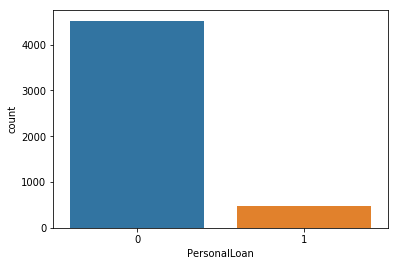

In [0]:
sns.countplot(loan_df_modified.PersonalLoan)

In [0]:
loan_df_modified.PersonalLoan.value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

# Comments

*   As we can see ,There are only 480 customer who applied for personal loan
*   Majority of datapoints related to those customer who did not applied personal loan which means there is huge gap b/w number of customer who applied and not applied for personal Load. 
*   Whatever model will be built , It'll learn more about those customer who not having personal loan.  


 


==================================================Question : 4 ==============================

In [0]:
X = loan_df_modified.loc[:,['Age','Experience','Income','Zip','Family','CreditSpendAvg','Education','MortgageHouse','SecurityAccount',
                           'CDAccount','OnlineBanking','CreditCard']]
y = loan_df_modified.loc[:,['PersonalLoan']]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [0]:
dummy=pd.get_dummies(X['Zip']);
X=pd.concat([X,dummy],axis=1)
X=X.drop(['Zip'],axis=1);

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [0]:
#scaling of data
cols = ['Age','Experience','Income','Family','CreditSpendAvg','MortgageHouse']
# first scaling according to z score ====consinder
for col in cols :
  #print((X2[col]-X2[col].mean())/X2[col].std(ddof=0))
  X[col]=(X[col]-X[col].mean())/X[col].std(ddof=0)

# Logistic Regression 

In [0]:
logistic_model=LogisticRegression()

In [0]:
logistic_model.fit(X_train,y_train)
y_logis_1=logistic_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
cols=list(X_train.columns)
coef_df = pd.DataFrame(logistic_model.coef_,columns=cols)
coef_df['intercept']=logistic_model.intercept_
coef_df.transpose()

In [0]:
logistic_model.score(X_test,y_test)

0.9446666666666667

In [0]:
confusion_matrix(y_test,y_logis_1)

array([[1329,   34],
       [  49,   88]])

In [0]:
accuracy_score(y_test,y_logis_1)

0.9446666666666667

In [0]:
print(classification_report(y_test, y_logis_1))  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1363
           1       0.72      0.64      0.68       137

    accuracy                           0.94      1500
   macro avg       0.84      0.81      0.82      1500
weighted avg       0.94      0.94      0.94      1500



## K-Nearest Neighbour

In [0]:
classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_knn_1=classifier.predict(X_test)

In [0]:
confusion_matrix(y_test, y_knn_1)

array([[1335,   28],
       [  93,   44]])

In [0]:
y_test_np=np.asarray(y_test)

In [0]:
error = []

# Calculating error for K values between 1 and 40
for k in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    y_pred_k = knn.predict(X2_test)
    error.append(1-accuracy_score(y2_test, y_pred_k))
    

In [0]:
error

In [0]:
accuracy_score(y_test,y_knn_1)

0.9193333333333333

In [0]:
print(classification_report(y_test, y_knn_1))  

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1363
           1       0.61      0.32      0.42       137

    accuracy                           0.92      1500
   macro avg       0.77      0.65      0.69      1500
weighted avg       0.91      0.92      0.91      1500



## Naive Bays

In [0]:
clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred_GNB_1=clf_GNB.predict(X_test)

In [0]:
clf_GNB.score(X_test,y_test)

0.372

In [0]:
confusion_matrix(y_test, y_pred_GNB_1)

array([[466, 897],
       [ 45,  92]])

In [0]:
accuracy_score(y_test, y_pred_GNB_1)

0.372

In [0]:
print(classification_report(y_test, y_pred_GNB_1))  

              precision    recall  f1-score   support

           0       0.91      0.34      0.50      1363
           1       0.09      0.67      0.16       137

    accuracy                           0.37      1500
   macro avg       0.50      0.51      0.33      1500
weighted avg       0.84      0.37      0.47      1500



In [0]:
=========================Second Way By removing Zip value ===========

In [0]:
X2 = loan_df_modified.loc[:,['Age','Experience','Income','Family','CreditSpendAvg','Education','SecurityAccount',
                           'CDAccount','OnlineBanking','CreditCard']]
y2 = loan_df_modified.loc[:,['PersonalLoan']]
#'MortgageHouse'
X2_train,X2_test,y2_train,y2_test=train_test_split(X2,y2,test_size=0.3)

In [0]:
#scaling of data
cols = ['Age','Experience','Income','Family','CreditSpendAvg']
# first scaling according to z score ====consinder
for col in cols :
  #print((X2[col]-X2[col].mean())/X2[col].std(ddof=0))
  X2[col]=(X2[col]-X2[col].mean())/X2[col].std(ddof=0)

=================================================Question : 5 =========================

1.   List item
2.   List item



# Logistic Regression 

In [0]:
logistic_model=LogisticRegression()

In [0]:
logistic_model.fit(X2_train,y2_train)
y_logis=logistic_model.predict(X2_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
cols=list(X2_train.columns)
coef_df = pd.DataFrame(logistic_model.coef_,columns=cols)
coef_df['intercept']=logistic_model.intercept_
coef_df.transpose()

,0
Age,-0.377307
Experience,0.377481
Income,0.049568
Family,0.541308
CreditSpendAvg,0.095578
Education,1.618628
SecurityAccount,-0.806256
CDAccount,3.325168
OnlineBanking,-0.611396
CreditCard,-1.029975


In [0]:
logistic_model.score(X2_test,y2_test)

0.952

In [0]:
confusion_matrix(y2_test,y_logis)

array([[1340,   21],
       [  51,   88]])

In [0]:
accuracy_score(y2_test,y_logis)

0.952

In [0]:
print(classification_report(y2_test, y_logis))  

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1361
           1       0.81      0.63      0.71       139

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.84      1500
weighted avg       0.95      0.95      0.95      1500



## K-Nearest Neighbour

In [0]:
classifier = KNeighborsClassifier(n_neighbors=19)  
classifier.fit(X2_train, y2_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [0]:
y_knn=classifier.predict(X2_test)

In [0]:
confusion_matrix(y2_test, y_knn)

array([[1333,   28],
       [  95,   44]])

In [0]:
y_test_np=np.asarray(y2_test)

In [0]:
error = []

# Calculating error for K values between 1 and 40
for k in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X2_train, y2_train)
    y_pred_k = knn.predict(X2_test)
    error.append(1-accuracy_score(y2_test, y_pred_k))
    

In [0]:
error

In [0]:
accuracy_score(y2_test,y_knn)

0.918

In [0]:
print(classification_report(y2_test, y_knn))  

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1361
           1       0.61      0.32      0.42       139

    accuracy                           0.92      1500
   macro avg       0.77      0.65      0.69      1500
weighted avg       0.90      0.92      0.91      1500



## Naive Bays

In [0]:
clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
y_pred_GNB=clf_GNB.predict(X_test)

In [0]:
clf_GNB.score(X_test,y_test)

0.8833333333333333

In [0]:
confusion_matrix(y_test, y_pred_GNB)

array([[1239,  110],
       [  65,   86]])

In [0]:
accuracy_score(y_test, y_pred_GNB)

0.8833333333333333

In [0]:
print(classification_report(y_test, y_pred_GNB))  

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1349
           1       0.44      0.57      0.50       151

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



===================================================Question : 6==================

Find confusion matrix along with above model 

==============================================Question : 7 ==================

* Logistics Regression model is performing well.I found 95% accuracy and 71% f score in predicting personal loan target person meanwhile other two model's performance are very poor.
* Since Naive bays model fits perfect way when all variable must be independent.Otherewise will not perform well.
* In short Naive Bayes has a higher bias but lower variance compared to logistic regression
* Here , Data-set contains feature columns mix with quantative,nomial,ordinal.
